In [148]:
import pandas as pd
from bs4 import BeautifulSoup
import csv

In [149]:
pagina = BeautifulSoup(open('fortune.html', mode='r'), 'html.parser')
tabela = pagina.find('div', {'class': 'rt-table'})
linhas = tabela.find('div', {'class': 'rt-tbody'})

conteudo_extraido = []
for linha in linhas:
    coluna = linha.find('div', {'role':'row'})
    conteudo = coluna.get_text(';').strip().split(';')
    conteudo_extraido.append(conteudo)

header = [
   'rank',
  'name',
  'revenues',
  'revenues-percent-change',
  'profits',
  'profits-percent-change',
  'assets',
  'market-value',
  'employees'
]

In [150]:
with open(file='fortune.csv', mode='w', newline='', encoding='utf8') as arquivo:
    escrever_linha = csv.writer(arquivo, delimiter=';')
    escrever_linha.writerow(header)

    for i in conteudo_extraido:
        escrever_linha.writerow(i)

In [151]:
fortune_df = pd.read_csv('fortune.csv', sep=';') 
display(fortune_df)

,rank,name,revenues,revenues-percent-change,profits,profits-percent-change,assets,market-value,employees
0,1,Walmart,"$559,151",6.7%,"$13,510",-9.2%,"$252,496","$382,642.8","2,300,000"
1,2,Amazon,"$386,064",37.6%,"$21,331",84.1%,"$321,195","$1,558,069.6","1,298,000"
2,3,Apple,"$274,515",5.5%,"$57,411",3.9%,"$323,888","$2,050,665.9","147,000"
3,4,CVS Health,"$268,706",4.6%,"$7,179",8.2%,"$230,715","$98,653.2","256,500"
4,5,UnitedHealth Group,"$257,141",6.2%,"$15,403",11.3%,"$197,289","$351,725","330,000"
...,...,...,...,...,...,...,...,...,...
95,96,3M,"$32,184",0.1%,"$5,384",17.8%,"$47,344","$111,642.1","94,987"
96,97,TJX,"$32,137",-23%,$90.5,-97.2%,"$30,813.6","$79,774.9","320,000"
97,98,Travelers,"$31,981",1.3%,"$2,697",2.9%,"$116,764","$37,933","30,294"
98,99,Capital One Financial,"$31,643",-6.3%,"$2,714",-51.1%,"$421,602","$58,097","51,985"


In [152]:
fortune_df.info #resumo de informações
fortune_df.dtypes # mostra o tipo de dado
fortune_df.describe().T # 'colunas numéricas' mean' = média dos valores, 'std' = desvio padrão, (min, max e medianas

,count,mean,std,min,25%,50%,75%,max
rank,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0


In [153]:
#trata os dados por coluna
dados_tratados = fortune_df[['revenues', 'revenues-percent-change', 'profits', 'profits-percent-change', 'assets', 'market-value', 'employees']].applymap(lambda x: x.replace('$','').replace('%', ''))

#Atualiza os dados do dataframe original
fortune_df.update(pd.DataFrame(dados_tratados, columns=[
    'revenues', 'revenues-percent-change', 'profits', 'profits-percent-change', 'assets', 'market-value', 'employees'
    ]))

display(fortune_df)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_14988\3372921069.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dados_tratados = fortune_df[['revenues', 'revenues-percent-change', 'profits', 'profits-percent-change', 'assets', 'market-value', 'employees']].applymap(lambda x: x.replace('$','').replace('%', ''))


,rank,name,revenues,revenues-percent-change,profits,profits-percent-change,assets,market-value,employees
0,1,Walmart,"559,151",6.7,"13,510",-9.2,"252,496","382,642.8","2,300,000"
1,2,Amazon,"386,064",37.6,"21,331",84.1,"321,195","1,558,069.6","1,298,000"
2,3,Apple,"274,515",5.5,"57,411",3.9,"323,888","2,050,665.9","147,000"
3,4,CVS Health,"268,706",4.6,"7,179",8.2,"230,715","98,653.2","256,500"
4,5,UnitedHealth Group,"257,141",6.2,"15,403",11.3,"197,289","351,725","330,000"
...,...,...,...,...,...,...,...,...,...
95,96,3M,"32,184",0.1,"5,384",17.8,"47,344","111,642.1","94,987"
96,97,TJX,"32,137",-23,90.5,-97.2,"30,813.6","79,774.9","320,000"
97,98,Travelers,"31,981",1.3,"2,697",2.9,"116,764","37,933","30,294"
98,99,Capital One Financial,"31,643",-6.3,"2,714",-51.1,"421,602","58,097","51,985"


In [154]:
#metodo to_csv escreve um arquivo csv apartir de um dataframe  
fortune_df.to_csv('fortune-limpo.csv')

In [155]:
df_tratado = pd.read_csv('fortune-limpo.csv')
display(df_tratado)


,Unnamed: 0,rank,name,revenues,revenues-percent-change,profits,profits-percent-change,assets,market-value,employees
0,0,1,Walmart,"559,151",6.7,"13,510",-9.2,"252,496","382,642.8","2,300,000"
1,1,2,Amazon,"386,064",37.6,"21,331",84.1,"321,195","1,558,069.6","1,298,000"
2,2,3,Apple,"274,515",5.5,"57,411",3.9,"323,888","2,050,665.9","147,000"
3,3,4,CVS Health,"268,706",4.6,"7,179",8.2,"230,715","98,653.2","256,500"
4,4,5,UnitedHealth Group,"257,141",6.2,"15,403",11.3,"197,289","351,725","330,000"
...,...,...,...,...,...,...,...,...,...,...
95,95,96,3M,"32,184",0.1,"5,384",17.8,"47,344","111,642.1","94,987"
96,96,97,TJX,"32,137",-23.0,90.5,-97.2,"30,813.6","79,774.9","320,000"
97,97,98,Travelers,"31,981",1.3,"2,697",2.9,"116,764","37,933","30,294"
98,98,99,Capital One Financial,"31,643",-6.3,"2,714",-51.1,"421,602","58,097","51,985"


LER E TRATAR OS ARQUIVOS (cidades-bruto.csv e estados-bruto.xml)

In [156]:
NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')

fonte #visualização do resultado

c:\ProgramData\anaconda3\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [213]:
#extraindo a informação do arquivo estados-bruto
dados_extraidos = []

for estado in fonte.find_all('estado'):
    nome = estado.find('nome').get_text()
    sigla = estado.find('sigla').get_text()
    regiao = estado.find('regiao').get_text()
    dados_extraidos.append([nome, sigla, regiao])


# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

cabecalho = ['estado', 'sigla', 'região']

with open(file='estados-limpo.csv', mode='w', newline='', encoding='utf8') as arquivo:
    escrever_linha = csv.writer(arquivo, delimiter=';')
    escrever_linha.writerow(cabecalho)

    for linha in dados_extraidos:
        escrever_linha.writerow(linha)

print('arquivo tratado e escrito')

arquivo tratado e escrito


In [158]:
#lendo o arquivo cidades-bruto.csv

fonte_df = pd.read_csv('cidades-bruto.csv', sep=',')

display(fonte_df)

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [159]:
#selecionando apenas o censo 2010

censo = fonte_df[fonte_df['Censo'] == 2010].reset_index(drop=True)


cidades_limpo_df = censo[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']] # pegando somente as informações necessarias 

cidades_limpo_df.to_csv('cidades-limpo.csv', sep=';', index=False) # salvando em um arquivo csv



MESCLAR OS DOIS DOIS AQUIVOS (estados-limpo.csv e cidades-limpo.csv) EM UM DATAFRAME

> Preciso unir os dois dataframes e isso não pode gerar NaN
> Não tem o nome de uma coluna que faça parte dos dois Df, sendo assim preciso renomear uma que vai ser a coluna estado
> Na coluna estado os dados estão com divergencia, em uma tenho os dados com acento e a outra não.

In [160]:
estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=';')

#renomear o cidades_df
cidades_df = cidades_df.rename(columns={'UF':'estado'})

lista_estados = set(cidades_df['estado'].tolist()) # transforma uma coluna em uma lista / o set tira os valores repetidos
print(len(lista_estados))


27


In [161]:

# mudando valores com acentos:
atualizar_acentos = {
    'AMAPA': 'AMAPÁ', 'CEARA': 'CEARÁ', 'GOIAS': 'GOIÁS', 'MARANHAO':'MARANHÃO', 'PARA': 'PARÁ', 'PARAIBA':'PARAÍBA', 'PARANA':'PARANÁ',
    'PIAUI':'PIAUÍ', 'RONDONIA':'RONDÔNIA', 'SAO PAULO':'SÃO PAULO'
}

estados_df['estado'] = estados_df['estado'].replace(atualizar_acentos)


display(cidades_df)

,estado,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5550,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5551,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5552,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5553,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [162]:


brasil_df = pd.merge(left=estados_df, right=cidades_df, on='estado', how='inner', indicator=True) # mescla os dois data framess


estados_set = set(brasil_df['estado']) # transforma uma coluna de interesse em um set para verificar os dados


brasil_df.to_csv('brasil.csv', sep=';', index=False)

QUAIS SÃO AS 10 CIDADES MAIS POPULOSAS DO BRASIL

In [163]:
top_10_cidades_df = brasil_df.sort_values(by='Pop_est_2009', ascending=False).head(10).reset_index(drop=True)

display(top_10_cidades_df)

,estado,sigla,região,nome,Pop_est_2009,PIB,PIB_percapita,_merge
0,SÃO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688,both
1,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,6186710,175739344.0,28405.949219,both
2,BAHIA,BA,NORDESTE,Salvador,2998056,32824228.0,10948.500000,both
3,DISTRITO FEDERAL,DF,CENTRO-OESTE,Brasília,2606885,131487264.0,50438.460938,both
4,CEARÁ,CE,NORDESTE,Fortaleza,2505552,31789186.0,12687.500000,both
5,MINAS GERAIS,MG,SUDESTE,Belo Horizonte,2452617,44595204.0,18182.699219,both
6,PARANÁ,PR,SUL,Curitiba,1851215,45762420.0,24720.210938,both
7,AMAZONAS,AM,NORTE,Manaus,1738641,40486108.0,23286.060547,both
8,PERNAMBUCO,PE,NORDESTE,Recife,1561659,24835340.0,15903.179688,both
9,PARÁ,PA,NORTE,Belém,1437600,16526989.0,11496.240234,both


QUAIS SÃO AS 5 CIDADES COM MENOR PIB PER CAPITA DA REGIÃO NORDESTE

In [171]:
nordeste_df = brasil_df.query('região == "NORDESTE"')

menor_pib_nordeste_df = nordeste_df.sort_values(by='PIB_percapita', ascending=True).head(5).reset_index(drop=True)

,estado,sigla,região,nome,Pop_est_2009,PIB,PIB_percapita,_merge
0,MARANHÃO,MA,NORDESTE,São Vicente Ferrer,20463,39492.960938,1929.969971,both
1,MARANHÃO,MA,NORDESTE,Cajapió,10337,22781.035156,2203.830078,both
2,PIAUÍ,PI,NORDESTE,Dom Inocêncio,10795,25457.230469,2358.239990,both
3,MARANHÃO,MA,NORDESTE,Timbiras,26909,63724.851562,2368.159912,both
4,MARANHÃO,MA,NORDESTE,Axixá,15203,36745.226562,2416.969971,both


QUAIS SÃO AS 15 CIDADES COM MAIOR PIB DO ESTADO DE SÃO PAULO

In [173]:
sao_paulo_cidades_df = brasil_df.query('estado == "SÃO PAULO"')
sao_paulo_cidades_df = sao_paulo_cidades_df.sort_values(by='PIB', ascending=False).head(15).reset_index(drop=True)

display(sao_paulo_cidades_df)

,estado,sigla,região,nome,Pop_est_2009,PIB,PIB_percapita,_merge
0,SÃO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688,both
1,SÃO PAULO,SP,SUDESTE,Guarulhos,1299283,32473828.0,24993.650391,both
2,SÃO PAULO,SP,SUDESTE,Campinas,1064669,31654720.0,29731.980469,both
3,SÃO PAULO,SP,SUDESTE,Osasco,718646,31616452.0,43994.468750,both
4,SÃO PAULO,SP,SUDESTE,São Bernardo do Campo,810979,28935768.0,35680.050781,both
5,SÃO PAULO,SP,SUDESTE,Barueri,270173,26908070.0,99595.703125,both
6,SÃO PAULO,SP,SUDESTE,Santos,417098,22546134.0,54054.761719,both
7,SÃO PAULO,SP,SUDESTE,São José dos Campos,615871,22018042.0,35751.058594,both
8,SÃO PAULO,SP,SUDESTE,Jundiaí,349929,16585137.0,47395.718750,both
9,SÃO PAULO,SP,SUDESTE,Santo André,673396,14709603.0,21843.910156,both


QUAL É O PIB DO ESTADO DE SANTA CATARINA?

In [183]:
santa_catarina_pib = brasil_df.query('estado == "SANTA CATARINA"')
santa_catarina_pib = santa_catarina_pib['PIB'].agg('sum')

print(f'{santa_catarina_pib:.2f}')

129806256.75


QUAL É A POPOULAÇÃO DA REGIÃO SUL?

In [177]:
sul_populacao = brasil_df.query('região == "SUL"')
sul_populacao = sul_populacao['Pop_est_2009'].agg('sum')
print(sul_populacao)

27719118


QUAL É O PIB PER CAPITO DAS CIDADES DO MATO GROSSO

In [184]:
mato_grosso_sul_df = brasil_df.query('estado == "MATO GROSSO"')
pib_medio = mato_grosso_sul_df['PIB_percapita'].agg('mean')
print(f'{pib_medio:.2f}')

20040.39


POPULACÃO DO BRASIL EM 2009

In [178]:
brasil_populacao = brasil_df['Pop_est_2009'].agg('sum')
print(brasil_populacao)

191176146


CRIAR DOIS GRAFICOS

<Axes: title={'center': 'População das 10 cidades menos populosas do Brasil'}, xlabel='Cidades', ylabel='População'>

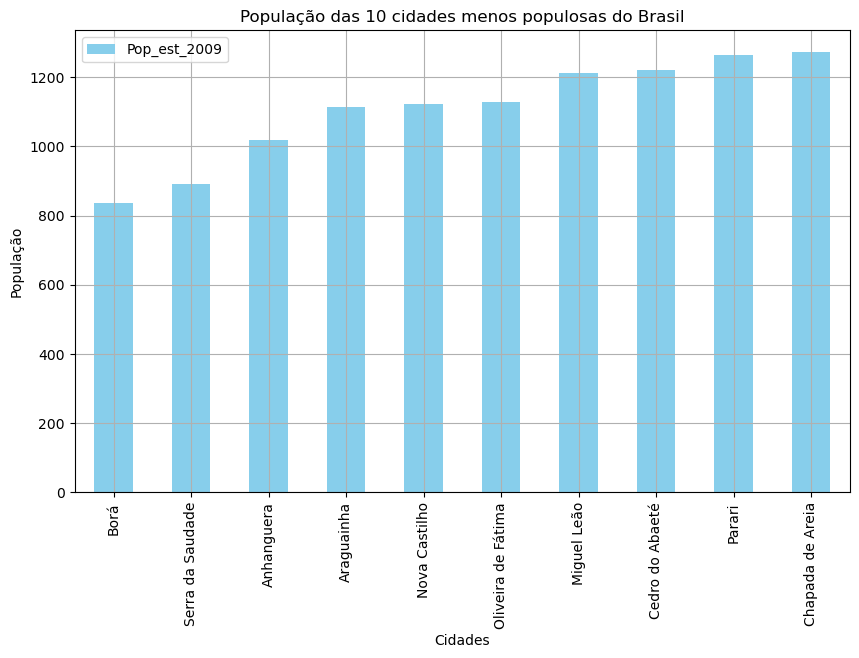

In [196]:
# GRAFICO DE BARRAS COM AS 10 CIDADES MENOS POPULOSAS DO BRASIL

cidades_menos_pop_br = brasil_df.sort_values(by='Pop_est_2009', ascending=True).head(10)

cidades_menos_pop_br.plot.bar(x='nome', y='Pop_est_2009', color='skyblue', title='População das 10 cidades menos populosas do Brasil', xlabel='Cidades', ylabel='População',  grid=True, figsize=(10, 6))

<Axes: title={'center': 'População por região'}, ylabel='População'>

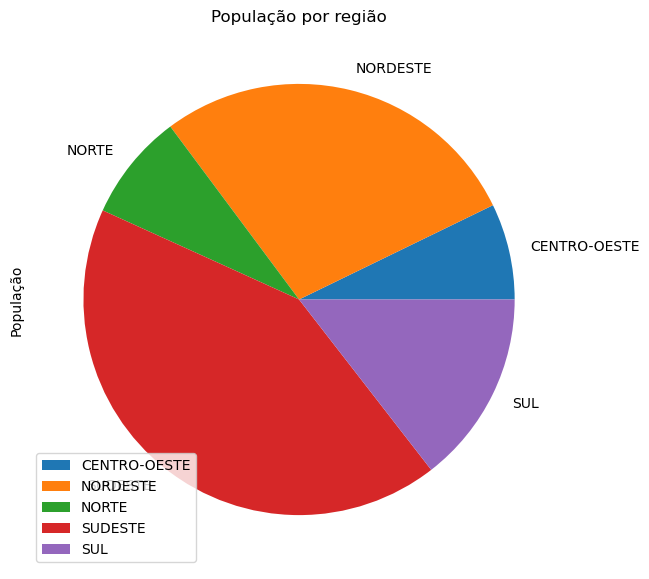

In [212]:
#Gere um gráfico de pizza com a proporção da população do Brasil por região.

regioes_df = brasil_df[['região', 'Pop_est_2009']]
regioes_df = regioes_df.groupby('região').agg('sum')

regioes_df.plot.pie(y='Pop_est_2009', title='População por região', ylabel='População', figsize=(13, 7))